In [1]:
import cv2
import numpy as np
import h5py
# from diffusion_policy.model.common.rotation_transformer import RotationTransformer

In [5]:
dataset_path_robomimic = 'diffusion_policy/data/robomimic/datasets/square/ph/image_abs.hdf5'
# dataset_path_robocasa = '../robocasa/datasets/v0.1/single_stage/kitchen_drawer/CloseDrawer/2024-04-30/demo_gentex_im128_randcams.hdf5'
dataset_path_robocasa = '../robocasa/datasets_first/v0.1/single_stage/kitchen_drawer/CloseDrawer/2024-04-30/demo_gentex_im128_randcams.hdf5'


In [18]:
demos=None
with h5py.File(dataset_path_robocasa) as file:
    # count total steps
    demos = file['data']['demo_1']['obs']
    print("Keys: %s" % demos.keys())
    # visualize image is cv2 video
    vid_data_cam1 = demos['robot0_agentview_left_image'] # shape (127, 84, 84, 3)
    vid_data_cam2 = demos['robot0_eye_in_hand_image'] # shape (127, 84, 84, 3)
    print("vid_data_cam1", vid_data_cam1.shape)
    print("vid_data_cam2", vid_data_cam2.shape)


Keys: <KeysViewHDF5 ['object', 'robot0_agentview_left_image', 'robot0_agentview_right_image', 'robot0_base_pos', 'robot0_base_quat', 'robot0_base_to_eef_pos', 'robot0_base_to_eef_quat', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eye_in_hand_image', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'robot0_joint_pos', 'robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel']>
vid_data_cam1 (189, 128, 128, 3)
vid_data_cam2 (189, 128, 128, 3)


In [19]:
demos=None
with h5py.File(dataset_path_robocasa) as file:
    # count total steps
    demos = file['data']['demo_1']['obs']
    print("Keys: %s" % demos.keys())
    # visualize image is cv2 video
    vid_data_cam1 = demos['robot0_agentview_left_image'] # shape (127, 84, 84, 3)
    vid_data_cam2 = demos['robot0_eye_in_hand_image'] # shape (127, 84, 84, 3)
    print("vid_data_cam1", vid_data_cam1.shape)


    # Set the video codec and create a VideoWriter to save the video if necessary
    # For displaying, no need for VideoWriter, just use cv2.imshow to display the images

    for frame1, frame2 in zip(vid_data_cam1, vid_data_cam2):
        # Concatenate the two frames side by side
        combined_frame = np.concatenate((frame1, frame2), axis=1)  # Concatenate along the horizontal axis

        # Show the combined frame
        cv2.imshow('Side-by-side Video', combined_frame)

        # Wait for a key press and check if the user wants to close the window
        if cv2.waitKey(100) & 0xFF == ord('q'):  # 30ms delay, 'q' to quit
            break

    # Release the window and close it
    cv2.destroyAllWindows()

Keys: <KeysViewHDF5 ['object', 'robot0_agentview_left_image', 'robot0_agentview_right_image', 'robot0_base_pos', 'robot0_base_quat', 'robot0_base_to_eef_pos', 'robot0_base_to_eef_quat', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eye_in_hand_image', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'robot0_joint_pos', 'robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel']>
vid_data_cam1 (189, 128, 128, 3)


In [7]:
demos=None
dim_to_list_vals = {}
with h5py.File(dataset_path_robocasa) as file:
    # count total steps
    print("Keys: %s" % file['data']['demo_1']['obs'].keys())
    actions = file['data']['demo_1']['actions']
    print("actions shape", actions.shape)
    print("ROBOCASA actions[0]", actions[60])
    for act in actions:
        for i in range(len(act)):
            if i not in dim_to_list_vals:
                dim_to_list_vals[i] = []
            dim_to_list_vals[i].append(act[i])
#     for act in actions:
#         print(act)
        
    print()
    robot0_eef_pos = file['data']['demo_1']['obs']['robot0_eef_pos']
    print("robot0_eef_pos shape", robot0_eef_pos.shape)
    print("ROBOCASA robot0_eef_pos[0]", robot0_eef_pos[-1])
    
    robot0_eef_quat = file['data']['demo_1']['obs']['robot0_eef_quat']
    print("robot0_eef_quat shape", robot0_eef_quat.shape)
    print("ROBOCASA robot0_eef_quat[0]", robot0_eef_quat[-1])
    
    robot0_gripper_qpos = file['data']['demo_1']['obs']['robot0_gripper_qpos']
    print("robot0_gripper_qpos shape", robot0_gripper_qpos.shape)
    print("ROBOCASA robot0_gripper_qpos[0]", robot0_gripper_qpos[-1])
    
    

Keys: <KeysViewHDF5 ['object', 'robot0_agentview_left_image', 'robot0_agentview_right_image', 'robot0_base_pos', 'robot0_base_quat', 'robot0_base_to_eef_pos', 'robot0_base_to_eef_quat', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eye_in_hand_image', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'robot0_joint_pos', 'robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel']>
actions shape (189, 12)
ROBOCASA actions[0] [-0.58571429  0.26428571 -0.40714286 -0.30857143 -0.05142857  0.32285714
 -1.          0.         -0.          0.          0.         -1.        ]

robot0_eef_pos shape (189, 3)
ROBOCASA robot0_eef_pos[0] [ 3.11246564 -0.60925575  0.82230039]
robot0_eef_quat shape (189, 4)
ROBOCASA robot0_eef_quat[0] [-0.5741627   0.54404257  0.40901484  0.45504036]
robot0_gripper_qpos shape (189, 2)
ROBOCASA robot0_gripper_qpos[0] [ 0.03911062 -0.04088979]


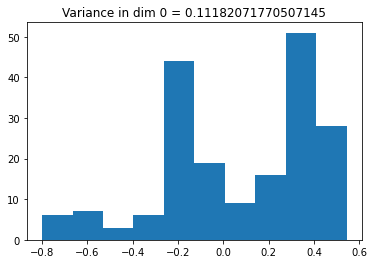

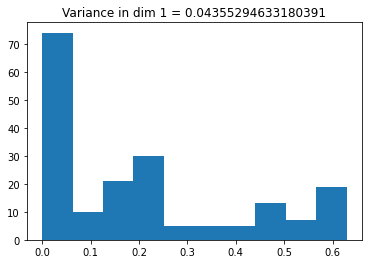

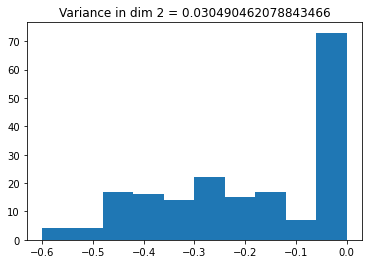

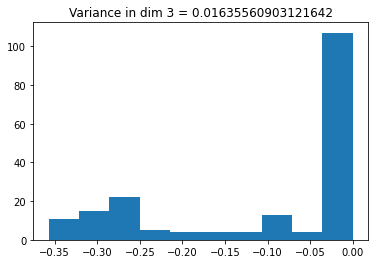

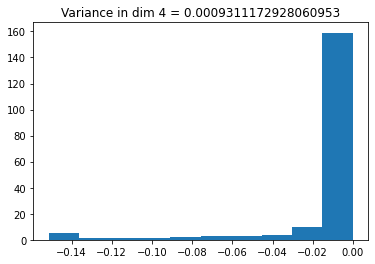

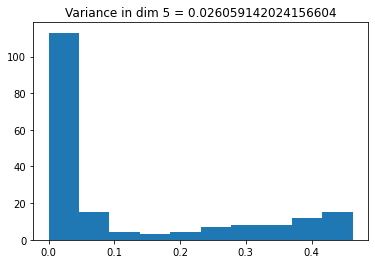

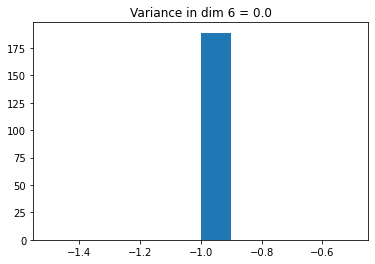

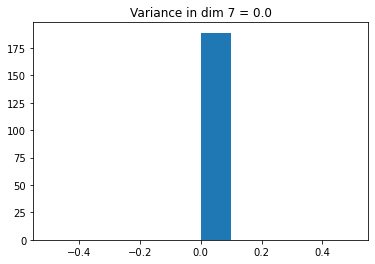

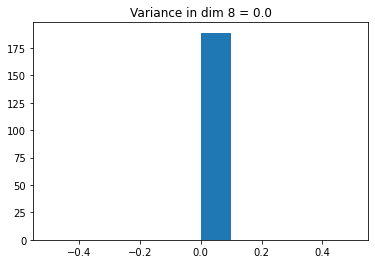

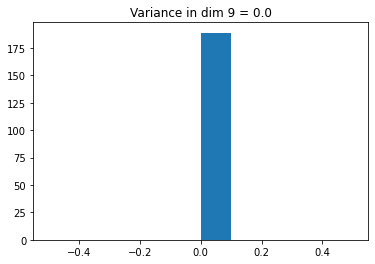

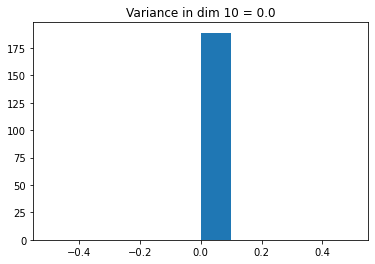

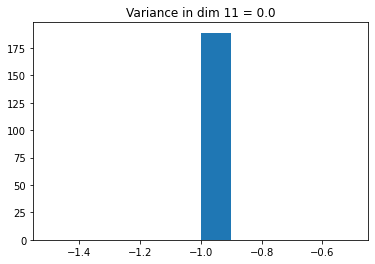

In [10]:
import matplotlib.pyplot as plt
for dim in dim_to_list_vals:
    plt.hist(dim_to_list_vals[dim])
    plt.title(f"Variance in dim {dim} = {np.var(dim_to_list_vals[dim])}")
    plt.show()
    plt.close()

In [64]:
demos=None
with h5py.File(dataset_path_robomimic) as file:
    # count total steps
    print("Keys: %s" % file['data']['demo_1']['obs'].keys())
    actions = file['data']['demo_1']['actions']
    print("actions shape", actions.shape)
    print("ROBOMIMIC actions[0]", actions[-1])
    robot0_eef_pos = file['data']['demo_1']['obs']['robot0_eef_pos']
    print("robot0_eef_pos shape", robot0_eef_pos.shape)
    print("ROBOMIMIC robot0_eef_pos[0]", robot0_eef_pos[-1])
    
    robot0_eef_quat = file['data']['demo_1']['obs']['robot0_eef_quat']
    print("robot0_eef_quat shape", robot0_eef_quat.shape)
    print("ROBOMIMIC robot0_eef_quat[0]", robot0_eef_quat[-1])
    
    robot0_gripper_qpos = file['data']['demo_1']['obs']['robot0_gripper_qpos']
    print("robot0_gripper_qpos shape", robot0_gripper_qpos.shape)
    print("ROBOMIMIC robot0_gripper_qpos[0]", robot0_gripper_qpos[-1])
    pos = actions[...,:3]
    rot = actions[...,3:6]
    gripper = actions[...,6:]
    rot = rotation_transformer.forward(rot)
    raw_actions = np.concatenate([
        pos, rot, gripper
    ], axis=-1).astype(np.float32)
    

Keys: <KeysViewHDF5 ['agentview_image', 'object', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eef_vel_ang', 'robot0_eef_vel_lin', 'robot0_eye_in_hand_image', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'robot0_joint_pos', 'robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel']>
actions shape (123, 7)
ROBOMIMIC actions[0] [ 0.18857399  0.17295242  0.97729298  0.42942524  3.08087576  0.05810376
 -1.        ]
robot0_eef_pos shape (123, 3)
ROBOMIMIC robot0_eef_pos[0] [0.22007399 0.17225242 0.94054298]
robot0_eef_quat shape (123, 4)
ROBOMIMIC robot0_eef_quat[0] [ 0.7758436   0.63001925  0.01808995 -0.02855184]
robot0_gripper_qpos shape (123, 2)
ROBOMIMIC robot0_gripper_qpos[0] [ 0.03620585 -0.03599788]


NameError: name 'rotation_transformer' is not defined

In [15]:
batch_size = 2
test = np.tile([0,0,0,0,-1], (batch_size,1))

In [17]:
np.hstack([test*5, test])

array([[ 0,  0,  0,  0, -5,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0, -5,  0,  0,  0,  0, -1]])